# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D  # Convolutional Layers
from keras.layers import Dense, Dropout, Flatten # Core Layers
from keras.layers import BatchNormalization
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math

# Import Dataset
CIFAR-10 Dataset contains 60,000 32x32 colored images.
There are 10 classes, with 6,000 images per class.

In [ ]:
# Split the dataset into train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


# Explore Data Structure

In [ ]:
# Image Dimensions
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000, 1)
X_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000, 1)


X_train: 50,000 images with height and width of 32 and 3 channels.
y_train: 50,000 images with the one target label per image.
X_test: 10,000 images with height and width of 32 and 3 channels.
y_test: 10,000 images with the one target label per image.

# View Images

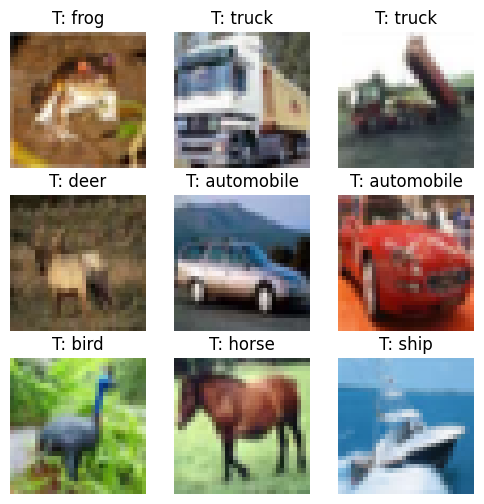

In [ ]:
def show_images(images, labels, label_map, n=10):
  n_images = min(n, len(images))
  cols = math.ceil(math.sqrt(n_images))
  rows = math.ceil(n_images / cols)

  plt.figure(figsize=(cols * 2, rows * 2))

  for i in range(n):
    plt.subplot(rows, cols, i+1)
    plt.imshow(images[i])
    plt.title(f"T: {label_map[labels[i][0]]}")
    plt.axis("off")
  plt.show()

label_map = {0:"airplane",
             1:"automobile",
             2:"bird",
             3:"cat",
             4:"deer",
             5:"dog",
             6:"frog",
             7:"horse",
             8:"ship",
             9:"truck"}

show_images(X_train, y_train, label_map, n=9)


# Normalize the Data

In [ ]:
# Check Intensity Values
print("Min:", X_train[0].min())
print("Max:", X_train[0].max())


Min: 0
Max: 255


In [ ]:
# Scale to 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print("Min:", X_train[0].min())
print("Max:", X_train[0].max())

Min: 0.0
Max: 1.0


# Create Validation Set
Only use the training set to split into validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)  # 10% of training data becomes validation set

# Check Shapes
# Training Sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\n")
# Validation Sets
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("\n")
# Test Sets
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (45000, 32, 32, 3)
y_train: (45000, 1)


X_val: (5000, 32, 32, 3)
y_val: (5000, 1)


X_test: (10000, 32, 32, 3)
y_test: (10000, 1)


# Model 1

In [ ]:
def model_1():
  model = Sequential()

  # Convolutional Layers (Feature Extraction)
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))  # 2nd convolution layer
  model.add(MaxPooling2D(pool_size=(2,2)))  # Reduces the image size of the feature map while keeping the most important information
  model.add(Dropout(0.2))  # Regularization technique to reduce overfitting. Will randomly drop a fraction of neurons in the layer (20%) in training only

  model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  # Dense Layers (Classification)
  model.add(Flatten())  # Converts multi-dimensional feature maps to 1D vector
  model.add(Dense(512, activation="relu"))  # Fully connected layer

  # Final Layer (Output)
  model.add(Dense(10, activation="softmax"))  # 10 neurons. Each neuron represents a class in the dataset

  # Prepare the model for training
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model


# Model 2

In [ ]:
def model_2():
  model = Sequential()

  # Convolutional Layer 1
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # Convolutional Layer 2
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  # Convolutional Layer 3
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  # Dense Layers
  model.add(Flatten())
  model.add(Dense(256, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # Output Layer
  model.add(Dense(10, activation="softmax"))

  # Compile
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model


# Model 3

In [ ]:
def model_3():
  model = Sequential()

  # Conv Layers
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  #  Dense Layer
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  # Output Layer
  model.add(Dense(10, activation="softmax"))

  # Compile
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model


# Model Architectures

In [ ]:
# Model 1 Architecture
model1 = model_1()
model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,578 (2.65 MB)

 Trainable params: 692,810 (2.64 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Model 2 Architecture
model2 = model_2()
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,610,314 (6.14 MB)

 Trainable params: 1,608,522 (6.14 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# Model 3 Architecture
model3 = model_3()
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

# Image Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

datagen.fit(X_train) # Only augment images in the TRAINING set only - never apply to validation or test sets or labels (eg. y_train because it contains labels and not images). Augmentation only applies to images

# Model Training

## Model 1

In [ ]:
batch_size =128
epochs = 25

# Define Early Stopping technique
earlystop = keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",  # val_accuracy is monitored
    patience = 5,
    verbose = 1,
    mode = "max",
    restore_best_weights = True
)

# Train Model 1
history1 = model1.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_val, y_val),  # Computes val_loss and val_accuracy
    callbacks = [earlystop]
)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.3320 - loss: 1.8385 - val_accuracy: 0.4368 - val_loss: 1.5364
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.5244 - loss: 1.3393 - val_accuracy: 0.5906 - val_loss: 1.1656
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.6025 - loss: 1.1316 - val_accuracy: 0.5556 - val_loss: 1.3408
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.6294 - loss: 1.0491 - val_accuracy: 0.6730 - val_loss: 0.9451
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 44s 125ms/step - accuracy: 0.6582 - loss: 0.9656 - val_accuracy: 0.6552 - val_loss: 0.9912
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.6848 - loss: 0.8992 - val_accuracy: 0.7006 - val_loss: 0.8763
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.6937 - loss: 0.8699 - val_accuracy: 0.7138 - val_loss: 0.8381
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 0.7097 - loss: 0.8266 - val_ac

## Model 2

In [ ]:
batch_size =128
epochs = 25

# Define Early Stopping technique
earlystop = keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",  # val_accuracy is monitored
    patience = 5,
    verbose = 1,
    mode = "max",
    restore_best_weights = True
)

# Train Model 2
history2 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_val, y_val),  # Computes val_loss and val_accuracy
    callbacks = [earlystop])

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.3213 - loss: 2.1845 - val_accuracy: 0.1790 - val_loss: 2.6606
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.5265 - loss: 1.3240 - val_accuracy: 0.5862 - val_loss: 1.1878
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.6100 - loss: 1.1037 - val_accuracy: 0.6272 - val_loss: 1.1178
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.6514 - loss: 0.9766 - val_accuracy: 0.5478 - val_loss: 1.4517
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.6851 - loss: 0.8905 - val_accuracy: 0.6428 - val_loss: 1.0636
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.7054 - loss: 0.8422 - val_accuracy: 0.7254 - val_loss: 0.7860
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.7224 - loss: 0.7960 - val_accuracy: 0.6674 - val_loss: 0.9904
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.7378 - loss: 0.7573 -

## Model 3

In [ ]:
batch_size =128
epochs = 25

# Define Early Stopping technique
earlystop = keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",  # val_accuracy is monitored
    patience = 5,
    verbose = 1,
    mode = "max",
    restore_best_weights = True
)

# Train Model 3
history3 = model3.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_val, y_val),  # Computes val_loss and val_accuracy
    callbacks = [earlystop]
)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.3022 - loss: 2.1741 - val_accuracy: 0.2248 - val_loss: 2.4789
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.5019 - loss: 1.3892 - val_accuracy: 0.5412 - val_loss: 1.3415
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.5891 - loss: 1.1500 - val_accuracy: 0.6382 - val_loss: 1.0642
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.6385 - loss: 1.0183 - val_accuracy: 0.6650 - val_loss: 1.0011
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.6694 - loss: 0.9362 - val_accuracy: 0.6590 - val_loss: 0.9884
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.6930 - loss: 0.8747 - val_accuracy: 0.7320 - val_loss: 0.7693
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.7135 - loss: 0.8255 - val_accuracy: 0.7204 - val_loss: 0.7836
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.7233 - loss: 0.7916 -

# Model Architectures Visualization


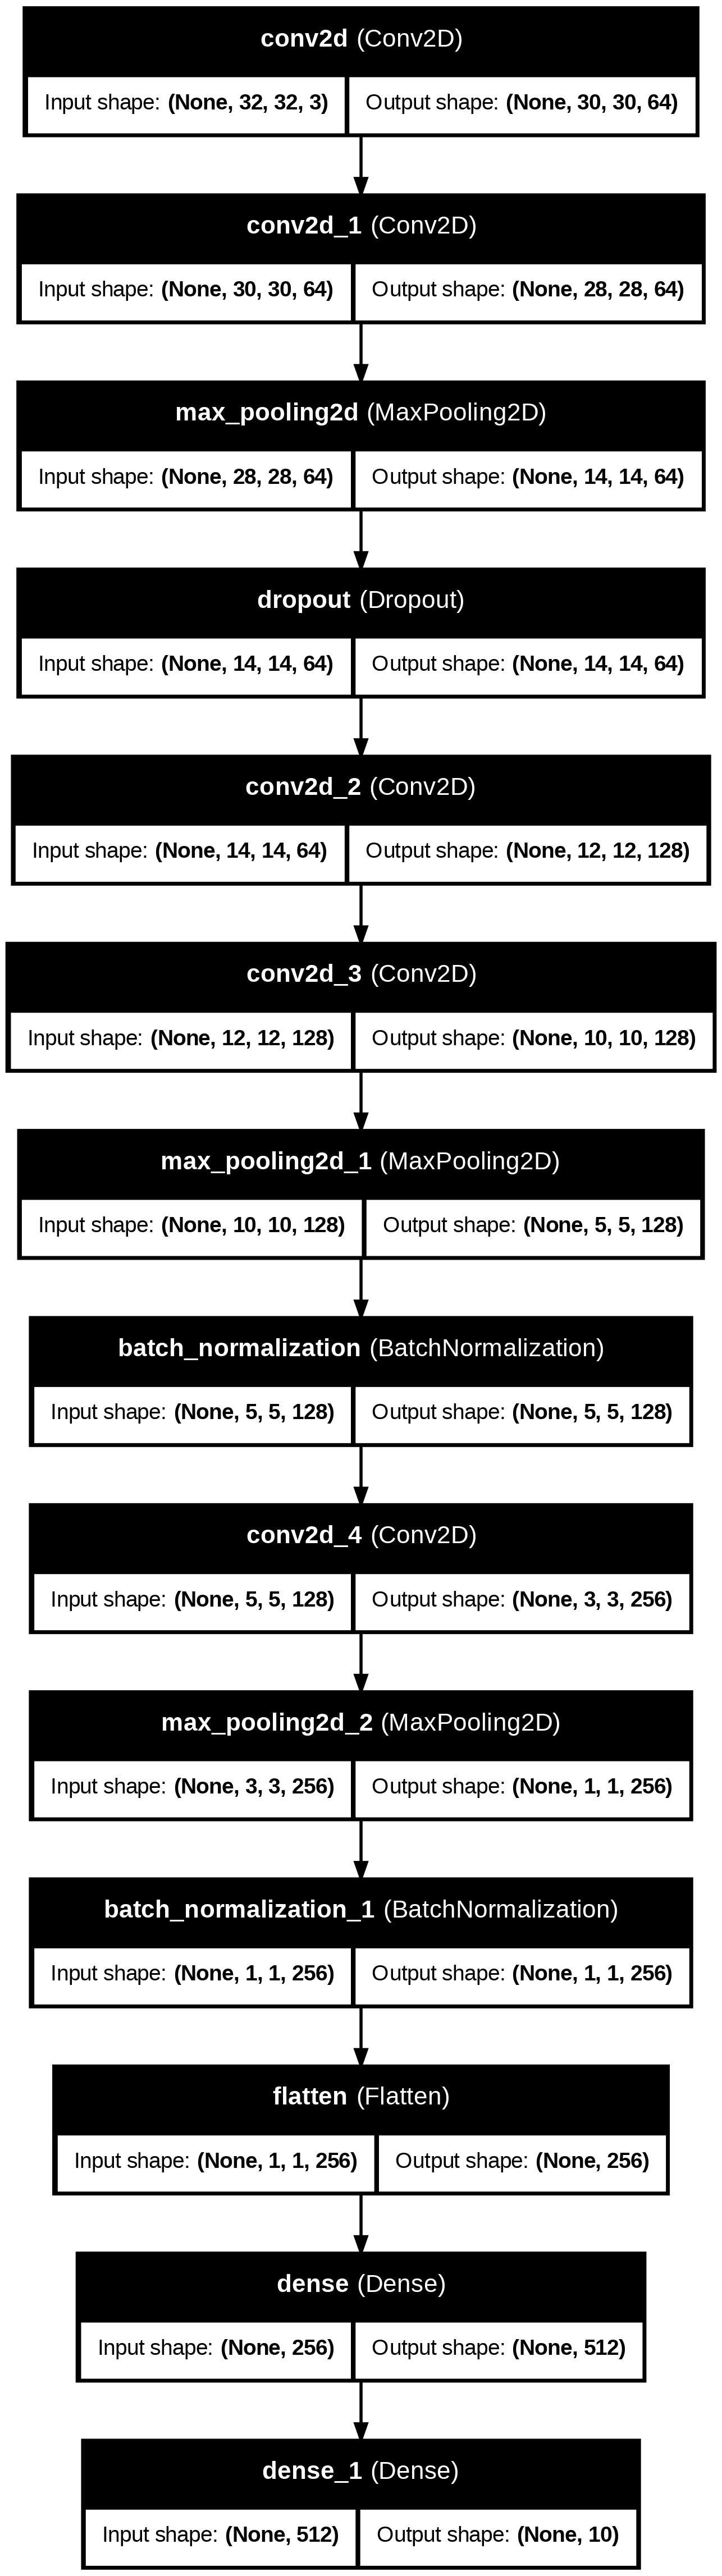

In [ ]:
# Model 1
plot_model(model1, to_file="CIFAR_Model1_Arch.png", show_shapes=True, show_layer_names=True)

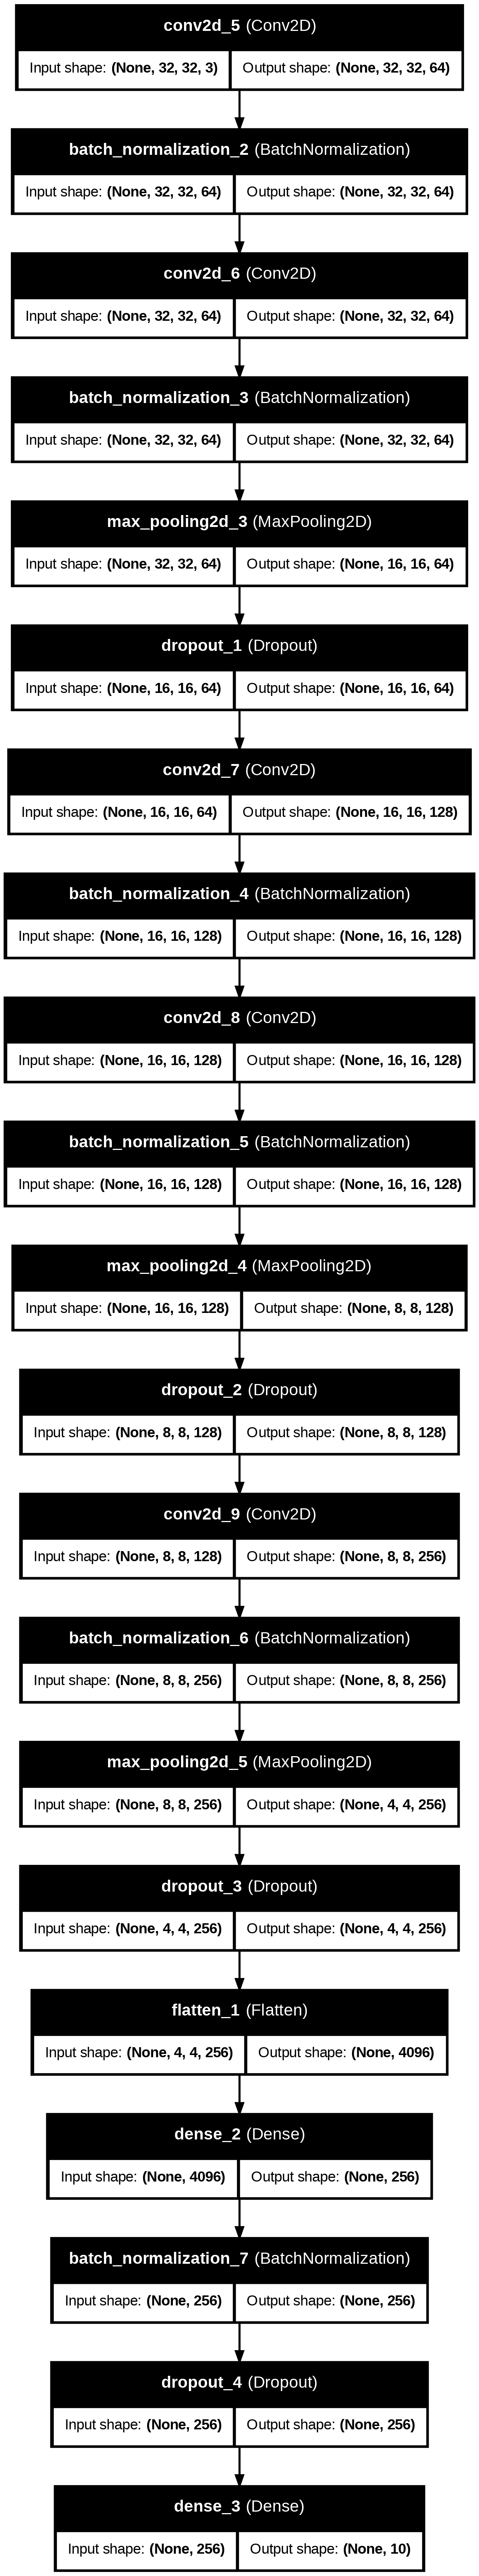

In [ ]:
# Model 2
plot_model(model2, to_file="CIFAR_Model2_Arch.png", show_shapes=True, show_layer_names=True)

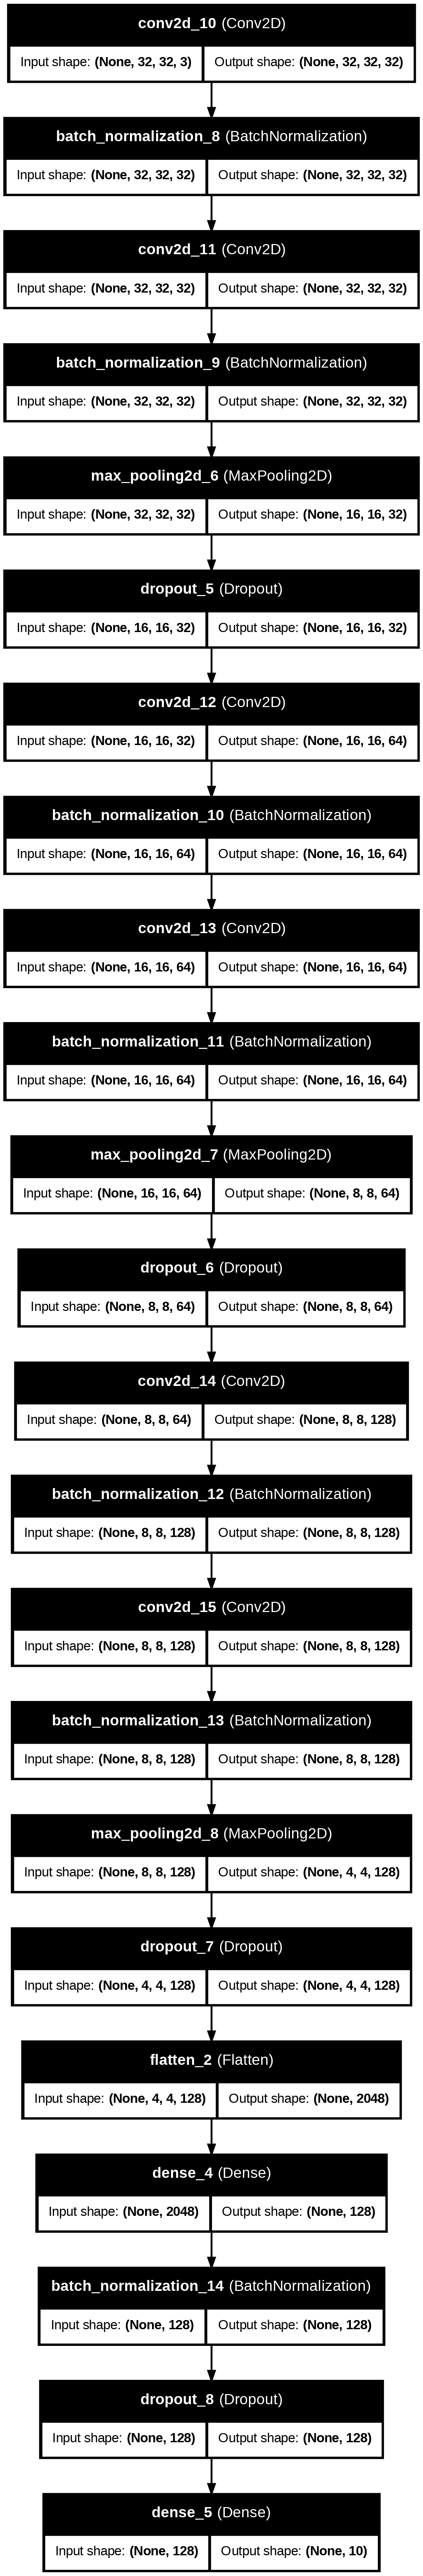

In [ ]:
# Model 3
plot_model(model3, to_file="CIFAR_Model3_Arch.png", show_shapes=True, show_layer_names=True)

# Model Evaluation

In [ ]:
# Metrics
print(history1.history.keys())
print(history2.history.keys())
print(history3.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Model Accuracy Graphs
Train and Val Accuracy for each model

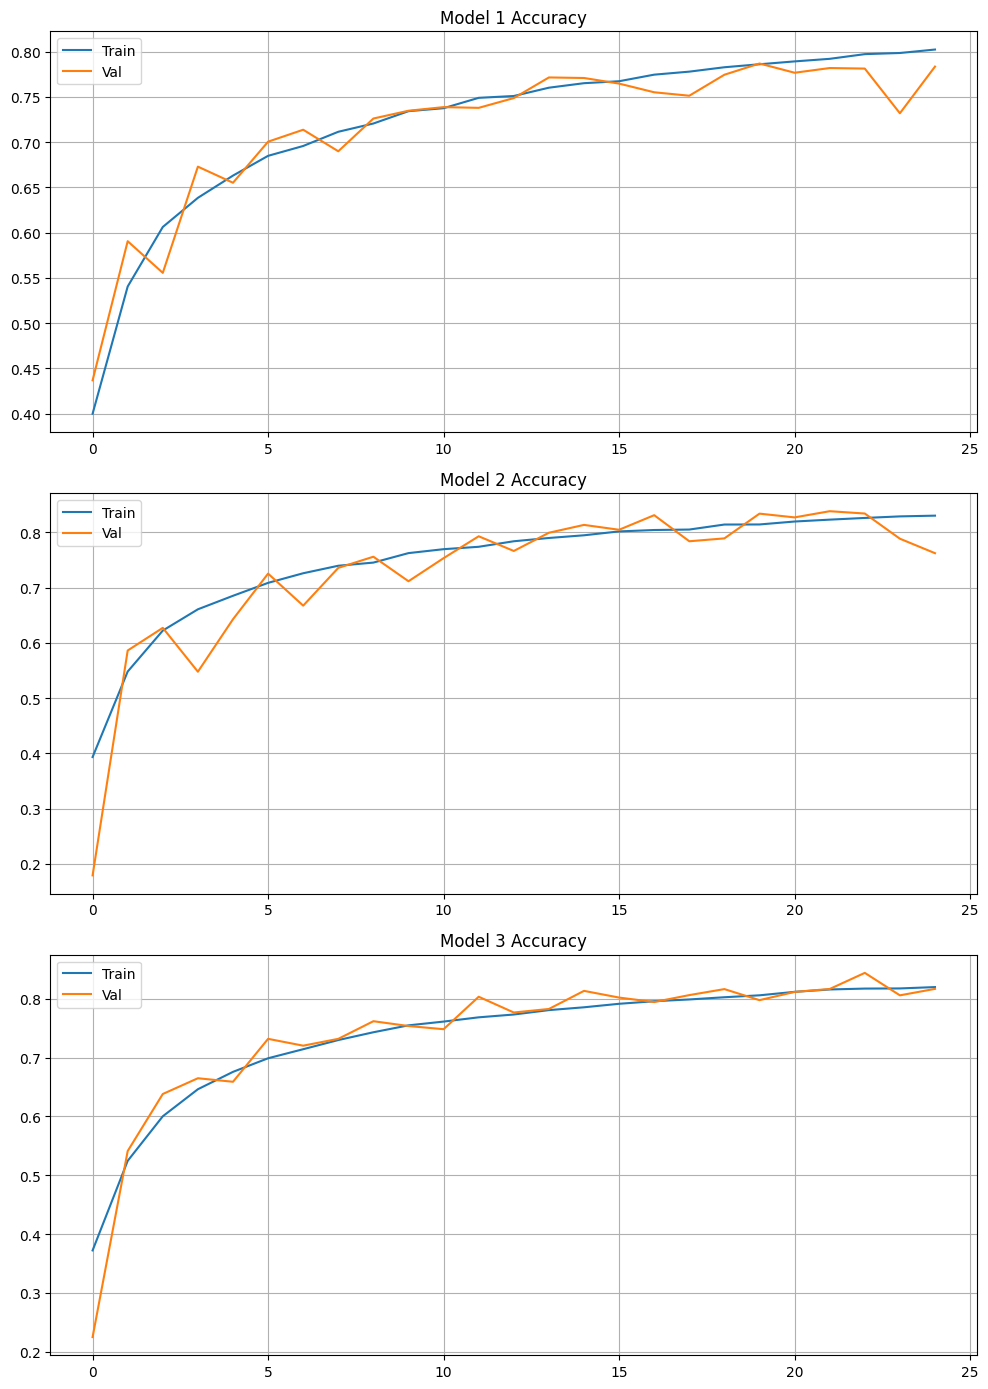

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14))

# Model 1
ax[0].plot(history1.history['accuracy'], label='Train')
ax[0].plot(history1.history['val_accuracy'], label='Val')
ax[0].set_title("Model 1 Accuracy")
ax[0].legend()
ax[0].grid(True)

# Model 2
ax[1].plot(history2.history['accuracy'], label='Train')
ax[1].plot(history2.history['val_accuracy'], label='Val')
ax[1].set_title("Model 2 Accuracy")
ax[1].legend()
ax[1].grid(True)

# Model 3
ax[2].plot(history3.history['accuracy'], label='Train')
ax[2].plot(history3.history['val_accuracy'], label='Val')
ax[2].set_title("Model 3 Accuracy")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


# Test the Model
Use test sets (X_test and y_test) to test the model

In [ ]:
# Evaluate the models using the test set
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)

print("Model 1")
print(f"Test Loss: {test_loss1:.2f}")
print(f"Test Accuracy: {test_acc1:.3f} ≈ {test_acc1 * 100:.2f}%")

print("Model 2")
print(f"Test Loss: {test_loss2:.2f}")
print(f"Test Accuracy: {test_acc2:.3f} ≈ {test_acc2 * 100:.2f}%")

print("Model 3")
print(f"Test Loss: {test_loss3:.2f}")
print(f"Test Accuracy: {test_acc3:.3f} ≈ {test_acc3 * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7859 - loss: 0.6445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8413 - loss: 0.4666
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - loss: 0.4648
Model 1
Test Loss: 0.63
Test Accuracy: 0.787 ≈ 78.69%
Model 2
Test Loss: 0.48
Test Accuracy: 0.839 ≈ 83.94%
Model 3
Test Loss: 0.46
Test Accuracy: 0.845 ≈ 84.50%


### Comparing Test Accuracies of the Models

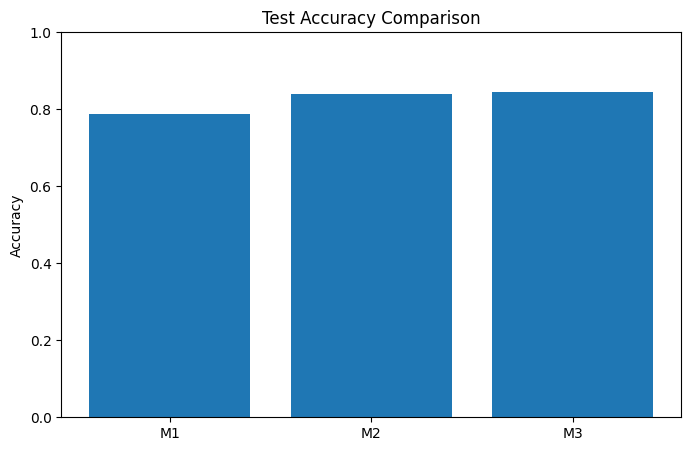

In [ ]:
# Plot Test Accuracies
accuracies = [test_acc1, test_acc2, test_acc3]
labels = ["M1", "M2", "M3"]

plt.figure(figsize=(8,5))
plt.bar(labels, accuracies)
plt.ylim(0,1)
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Accuracy and Loss Table of Model 3
evaluation = pd.DataFrame(history3.history)
evaluation.head()

,accuracy,loss,val_accuracy,val_loss
0,0.372156,1.834523,0.2248,2.478869
1,0.524533,1.325270,0.5412,1.341484
2,0.600289,1.122905,0.6382,1.064173
3,0.646311,0.999071,0.6650,1.001086
4,0.675844,0.922240,0.6590,0.988381


<Axes: >

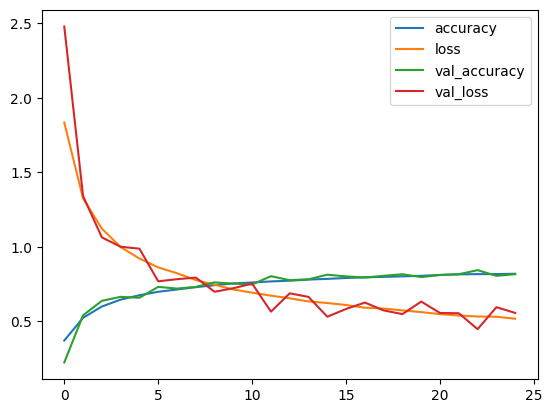

In [ ]:
# Evaluation Plot
evaluation.plot()

### Model 3 Accuracy

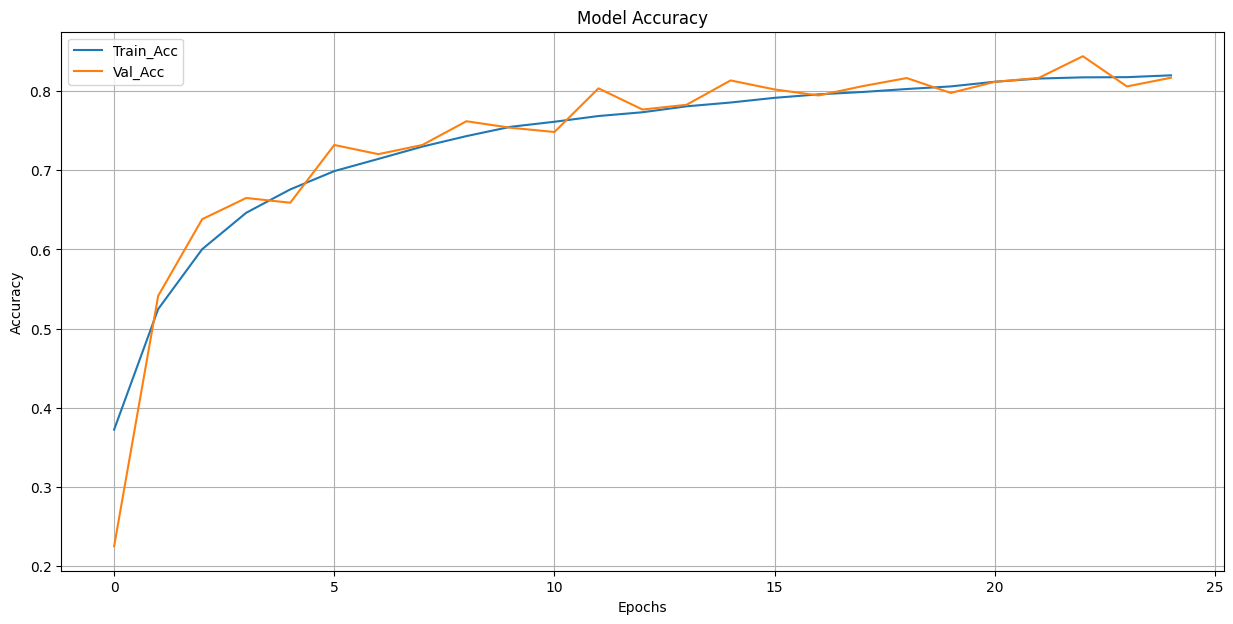

In [ ]:
plt.figure(figsize=(15,7))

plt.plot(history3.history["accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train_Acc", "Val_Acc"])
plt.grid()
plt.show()

### Model 3 Loss

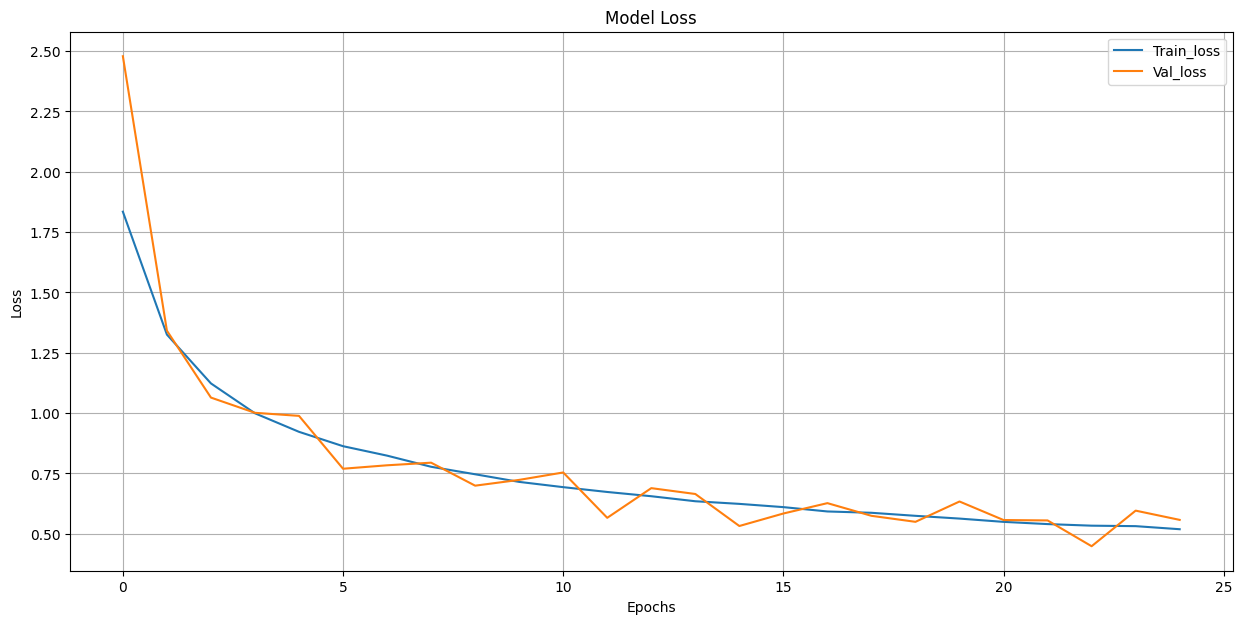

In [ ]:
plt.figure(figsize=(15,7))

plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train_loss", "Val_loss"])
plt.grid()
plt.show()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


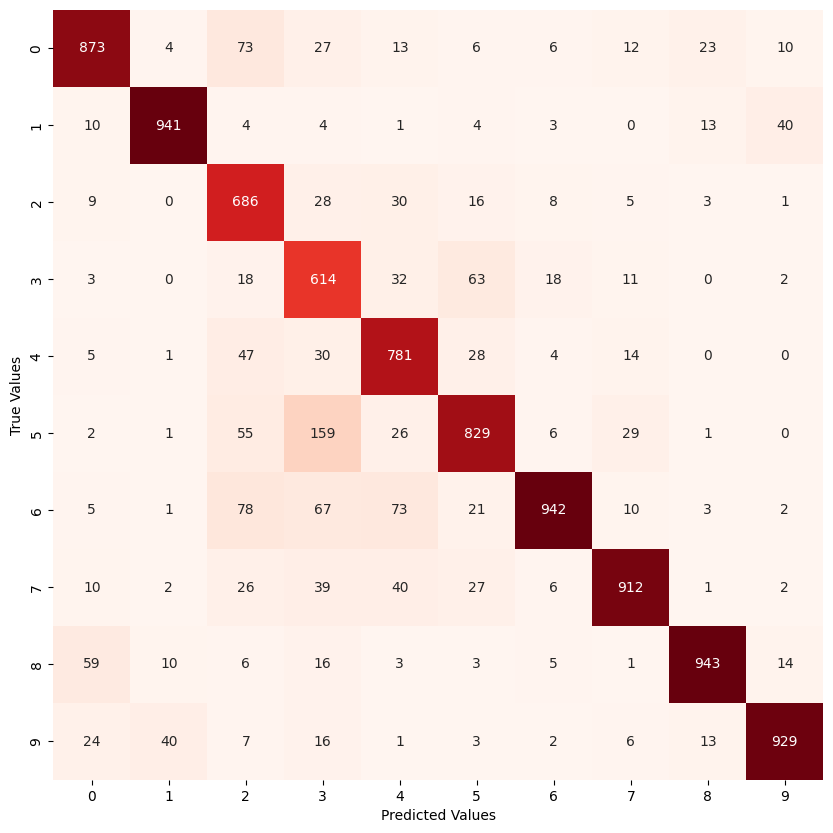

In [ ]:
fig = plt.figure(figsize=(10,10))

y_pred = model3.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test,  y_pred_classes)

# Plot Matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False, cmap=plt.cm.Reds, fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()